<b>Wiederholung</b>

Die Themen aus unserem Kurs Schritt für Schritt

**Schritt 1**

Zeitungsartikel aus der New York Times sollen analysiert werden. Sie müssen aber erst aufbereitet werden.

Ich öffne die Datei nyt.txt in einem Editor. Man sieht: Es gibt Zeilen mit dem Text "Seite". Anscheinend trennen diese Zeilen die einzelnen Artikel voneinander.

Ich schreibe in die letzte Zeile der Datei nyt.txt "Seite".

Jetzt lade ich die Datei in den Ordner "sample_data".

**Schritt 2**

Ich lese die Datei zeilenweise mit dem Template aus der ersten Woche in Colab ein.

In [ ]:
filename = '/Users/qbukold/Downloads/nyt.txt'

content = []
with open(filename, "r") as file_content:
    for line in file_content.readlines():
        line = line.strip()
        content.append(line)

for line in content: 
    print (line)

**Schritt 4: TSV generieren**

Kombiniere Zeilen, bis bestimmter Marker auftaucht

In [ ]:
import re

new_list = []
doc = []
id = 1
for i, line in enumerate(content):
    if i <= 2:
        continue

    doc.append(line)
    if re.match("Copyright .* The New York Times Company", line):
        string_for_list = ' '.join(doc)
        string_for_list = str(id)+'\t'+string_for_list
        new_list.append(string_for_list)
        doc = []
        id += 1

for line in new_list:
    print (line)


**Zusatz**
# Textdubletten

Kurz, zwischendurch: In genau diesem Format können wir das Skript zur Erkennung von Dubletten vom 23. November verwenden. Ich brauche nur drei kleine Anpassungen.


(Läuft etwa 30 Min.)

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import re
import math

# Kosinusähnlichkeit
# Quelle:
# https://stackoverflow.com/questions/41827983/right-way-to-calculate-the-cosine-similarity-of-two-word-frequency-dictionaries
def kosinusaehnlichkeit(dic1, dic2):

    numerator = 0
    dena = 0
    for key1,val1 in dic1.items():
        numerator += val1*dic2.get(key1,0.0)
        dena += val1*val1
    denb = 0
    for val2 in dic2.values():
        denb += val2*val2
    return numerator/math.sqrt(dena*denb)



# Fingerabdruck aus einem Text erstellen
def fingerabdruck_erstellen(text):

    # Den Text auf seine "seltenen Buchstaben" reduzieren
    seldom = text.lower()
    seldom = re.sub('[^qxyjvpzkw]', '', seldom)

    # 5-Grams produzieren
    ngrams = []
    for i, character in enumerate(seldom):
        ngram = seldom[i:i+5]
        ngrams.append(ngram)
    count_ngrams = {i:ngrams.count(i) for i in ngrams}

    return count_ngrams


#
#  ==> Hier "startet" das Skript.
#

# Datei einlesen
#filename = 'sample_data/standard.tsv'
#content = []
# ÄNDERUNG 1: Der Teil, in dem eine Datei eingelesen wird, wurde auskommentiert.
#with open(filename, "r") as file_content:
#    for line in file_content.readlines():
#        line = line.strip()
#        content.append(line)


# Die TSV-Datei zeilenweise durchlaufen
for i, line in enumerate(new_list):
    cells = line.split('\t')

    id = cells[0]
    text = cells[1]
    count_ngrams = fingerabdruck_erstellen(text)

    print (id)
    # Jetzt: Die TSV-Datei noch einmal durchlaufen
    for j, line_2 in enumerate(new_list):

        if j<=i:
            continue

        cells_2 = line_2.split('\t')

        id_2 = cells_2[0]
        text_2 = cells_2[1]

        count_ngrams_2 = fingerabdruck_erstellen(text_2)


        cosine = kosinusaehnlichkeit(count_ngrams, count_ngrams_2)
        if cosine > 0.5 and cosine < 1:
            print ('######')
            print ('ID 1: '+id)
            print ('ID 2: '+id_2)
            print (cosine)

**Schritt 4**

Zurück zum TSV-Format (Variable new_list).

Die Texte sollen mit der Terminologieliste "termlist.txt" abgeglichen werden.

Ich lade die Datei - wie immer - in den Ordner sample_data. Über das Template aus der ersten Woche lade ich sie zeilenweise ein.

Dann sollen die Zeitungstexte mit den Part-of-Speech-Tagger "HanTa" lemmatisiert werden, d. h.: Jedes Wort soll durch seine Grundform ersetzt werden. 

Danach soll jede dieser Grundformen mit der Terminologieliste "termlist" abgeglichen werden.

Ich verwende dafür Teile aus der Datei "Python-Vorlage: read termlist" vom 30. November.

Noch ein Zusatz: Mit der Option "re.IGNORECASE" in einem regulären Ausdruck spielt die Groß- und Kleinschreibung keine Rolle. Finden Sie die Syntax dazu im Internet?

(Enthält vier Fehler.)

(Läuft etwa 3 Min.)

In [ ]:
filename = '/Users/qbukold/Downloads/termlist.txt'
termlist = []
with open(filename, "r") as file_content:
    for line in file_content.readlines():
        line = line.strip()
        termlist.append(line)

# NLTP installieren
# HanTa installieren und inkludieren
#!pip install HanTa
from HanTa import HanoverTagger as ht
import nltk
nltk.download('punkt')

# Zeile muss angepasst werden, um ein englisches Modell zu laden.
tagger = ht.HanoverTagger('morphmodel_en.pgz')  

for line in new_list:
    words = nltk.word_tokenize(line)
    tagged_words = tagger.tag_sent(words,taglevel= 1)

    for tagged_word in tagged_words:
        token = tagged_word[0]
        lemma = tagged_word[1]
        pos = tagged_word[2]
        #print(lemma)

        # Abgleich mit der Liste "termlist"
        for entry in termlist:
            if re.search(f'{entry}', lemma, re.IGNORECASE):
                print(line)
                print(lemma)

**Schritt 5**

Ich will zählen, wie oft welches Suchwort gefunden wird. Darum erweitere ich das Skript von gerade.

(Enthält 5 Fehler)

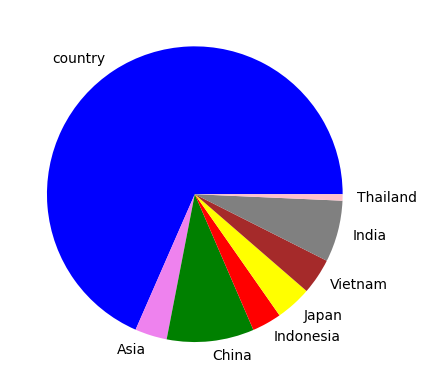

In [26]:

'''

# Den Teil brauche ich nicht mehr:

filename = 'sample_data/termlist.txt'
termlist = []
with open(filename, "r") as file_content:
    for line in file_content.readlines():
        line = line.strip()
        termlist.append(line)

# NLTP installieren
# HanTa installieren und inkludieren
!pip install HanTa
from HanTa import HanoverTagger as ht
import nltk
nltk.download('punkt')

# Zeile angepasst, um ein englisches Modell zu laden. Das Modell war ursprünglich: morphmodel_ger.pgz
tagger = ht.HanoverTagger('morphmodel_en.pgz')
'''



# Ein Dict, um Treffer zu zählen
collect_matches = {}

for line in new_list:
    words = nltk.word_tokenize(line)
    tagged_words = tagger.tag_sent(words,taglevel= 1)

    for tagged_word in tagged_words:
        token = tagged_word[0]  
        lemma = tagged_word[1]  
        pos = tagged_word[2]  

        # Abgleich mit der Liste "termlist"
        for entry in termlist:
            if re.search(rf'{entry}', lemma, re.IGNORECASE):
                if entry in collect_matches:
                    collect_matches[entry] += 1
                else:
                    collect_matches[entry] = 1

# NEU: Zählung wird geplottet.
# (Die Farben hab ich aus einer der Abgaben)
import matplotlib.pyplot as plt 
import numpy as np 

y = collect_matches.values()
mylabels = collect_matches.keys()
mycolors = ["blue", "violet", "green","red","yellow","brown","grey","pink"]

plt.pie(y, labels=mylabels, colors=mycolors)
plt.show()



**Zusatz: Textklassifikation mit BERT**

Ein letzter Teil der Wiederholung: Im Januar wurden Verfahren zur Textklassifikation vorgestellt - am 25. Januar auch zur Termextraktion mit keyBERT und zum Auffinden ähnlicher Sätze mit SBERT.

BERT verwendet eine eigene Form der Tokenisierung. **Vor der Anwendung von BERT ist es nicht notwendig, Texte zu lemmatisieren!** 

BERT kann mit Colab erstaunlich einfach angewendet werden. Unten wird das Skript vom 18. Januar wiederholt. Wir benötigen auch die beiden Dateien train_data.tsv und apply_data.tsv, die auch zum 18. Januar im Learnweb sind. 

In [ ]:
# 
# Textklassifikation mit BERT
#
#
# Quellen für das Skript:
# https://github.com/ThilinaRajapakse/simpletransformers
# und https://simpletransformers.ai
#
# Quelle für das Modell:
# https://deepset.ai/german-bert
#

# Trainieren
print ("TRAINIEREN")
train_df = pd.read_csv('sample_data/training_data.tsv', sep='\t')
model = ClassificationModel('distilbert', 'distilbert-base-german-cased', use_cuda=False, args={'overwrite_output_dir': True, 'num_train_epochs': 1, 'num_workers': 0})
model.train_model(train_df)


# Trainiertes Modell anwenden
apply_data = []
with open('sample_data/apply_data.tsv', "r") as file_content:
    for line in file_content.readlines():
        line = line.strip()
        apply_data.append(line)

predictions, raw_outputs = model.predict(apply_data)
print ("Ergebnisse: ")
for i, line in enumerate(predictions):
    print (str(i)+'\t'+apply_data[i]+'\t'+str(line)+'\t'+str(raw_outputs[i]))

**Hinweis zu Trainingsdaten**

Am 11. Januar haben wir einen Naive Bayes-Klassifizierer trainiert. Im Learnweb sind dazu Trainingsdaten: Textstücke, die entweder positiv oder negativ sind. 

Können Sie damit einen Modell zur Textklassifikation trainieren?

Im Learnweb sind zum 11. Januar in der Datei 02_Rezensionen Texte, mit denen wir den Klassifizierer testen können. Wie gut funktioniert die Klassifikation?

Wenn sie für manche Texte nicht gut funktioniert: Liegt das an den Trainingsdaten? Können wir sie Trainingsdaten evtl. anpassen?